# SVM for classification

Load IRIS dataset, check its contents:


In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [3]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
#X.shape

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [4]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)


1.0

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [5]:
from sklearn.model_selection import train_test_split
X=iris.data[iris.target != 2, 0:2]
y=iris.target[iris.target != 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

feature1 = iris.data[:,0]
feature2 = iris.data[:,1]
#print(iris.data)
#print(feature1)
#print(feature2)

(80, 2)
(20, 2)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

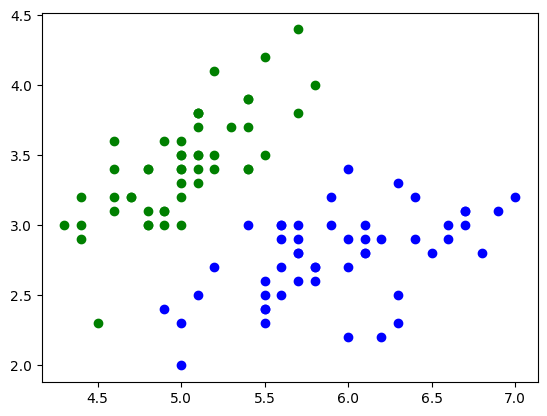

In [6]:
import matplotlib.pyplot as plt 
plt.figure()
plt.scatter(X[y==0,0], X[y==0,1], color='green')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
#plt.scatter(X[y==2,0], X[y==2,1], color='cyan')
plt.show()


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [7]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear', C=1)
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

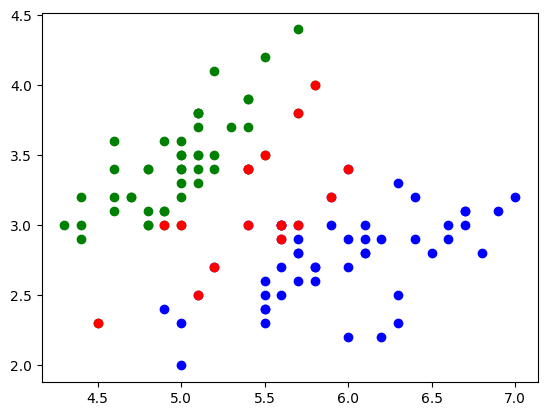

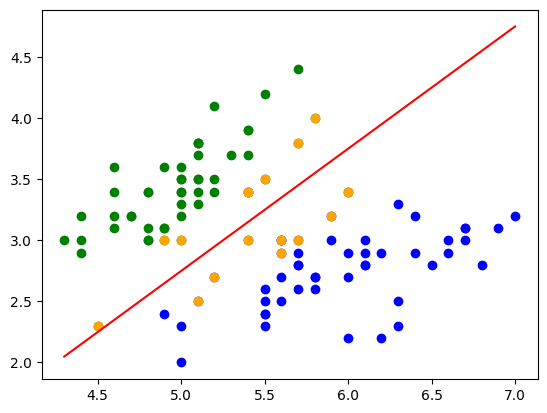

In [8]:
import numpy as np
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here
#print(supvectors.shape)
plt.figure()
plt.scatter(X[y==0,0],X[y==0,1],color='green')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.scatter(supvectors[:,0],supvectors[:,1],color='red')
plt.show()

#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
#print(W)
#print(b)

x0 = np.linspace(min(X_train[:,0]), max(X_train[:,0]), 10)
x1 = -W[0,0]*x0/W[0,1] - b/W[0,1]
#print(x0)
#print(x1)

plt.figure()
plt.scatter(X[y==0,0],X[y==0,1],color='green')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.scatter(supvectors[:,0],supvectors[:,1],color='orange')
plt.plot(x0, x1, color='red')
plt.show()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

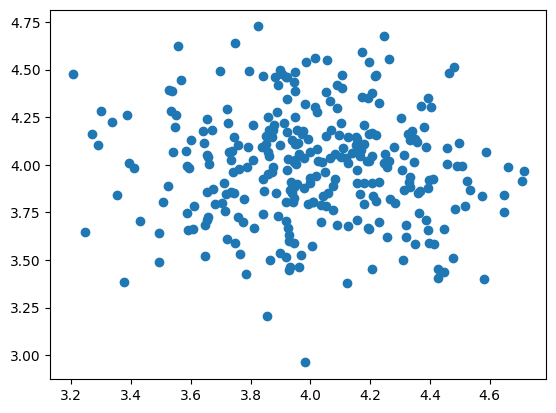

In [9]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

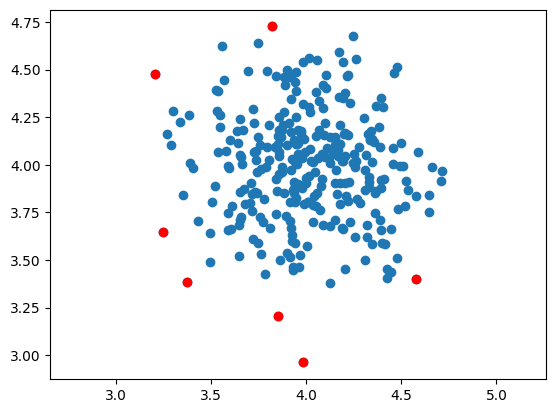

In [10]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

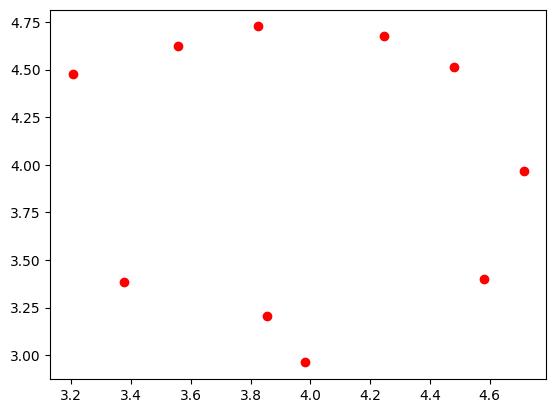

In [13]:
supvectors2=SVMmodelOne.support_vectors_
plt.figure()
plt.scatter(supvectors2[:,0],supvectors2[:,1],color='red')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


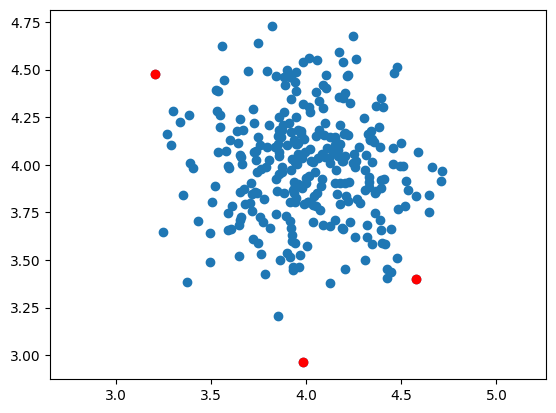

In [12]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()